In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset (IPL_dataset.csv)
df = pd.read_csv("IPL_dataset.csv")

In [11]:
df

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,Khaleel Ahmed,7,1,0,0,0*,0.00,2,0.00,0,0,0,0
129,130,Arshdeep Singh,8,1,0,0,0*,0.00,3,0.00,0,0,0,0
130,131,Daniel Sams,3,1,0,0,0*,0.00,2,0.00,0,0,0,0
131,132,Shreevats Goswami,2,2,0,0,0*,0.00,4,0.00,0,0,0,0


In [12]:
# check if any null values
df.isna().sum()

Jersey No        0
Player           0
Matches          0
Inns             0
Not Out          0
Runs             0
Highest Score    0
Avg              0
Balls faced      0
Strike rate      0
100              0
50               0
4s               0
6s               0
dtype: int64

In [13]:
# check datatypes of columns
df.dtypes

Jersey No          int64
Player            object
Matches            int64
Inns               int64
Not Out            int64
Runs               int64
Highest Score     object
Avg              float64
Balls faced        int64
Strike rate      float64
100                int64
50                 int64
4s                 int64
6s                 int64
dtype: object

In [28]:
# Q1. What is the maximum number of matches played by an individual player in a season? Print the player name along with the number of matched played.
matches = df['Matches'].values
idx = np.argsort(-matches)
res=df.iloc[idx]
res[['Player','Matches']].head(1)

# np.argsort() - gives index positions after sorting
#-matches - sorts in descending order
# df.iloc[idx] - rearranges rows based on numpy sorting

,Player,Matches
1,Shikhar Dhawan,17


In [4]:
# Q2. Top 2 players with maximum Average who have scored atleast 2 half centuries?

# filter data which have atleast 2 half centuries
filter_data=df[df['50']>=2]

# get index position after sorting
idx = np.argsort(-filter_data['Avg'].values)

# rearrange rows based on numpy sorting
res = filter_data.iloc[idx]
print(res[['Player','Avg','50']].head(2))


             Player    Avg  50
36  Wriddhiman Saha  71.33   2
4      Ishan Kishan  57.33   4


In [75]:
# Q3. Create 2 new columns based on Player name.
#First column will have first name and second column will have last name. 
#Eg: for the player Shikhar Dhawan, Shikhar will be the first name and Dhawan will be the last name.

# str.split() - to slit a string into parts on basis of some delimiter, here " " is delimiter
df[['first name', 'last name']] = df['Player'].str.split(" ", n=1, expand = True)
df[['first name', 'last name']]

,first name,last name
0,KL,Rahul
1,Shikhar,Dhawan
2,David,Warner
3,Shreyas,Iyer
4,Ishan,Kishan
...,...,...
128,Khaleel,Ahmed
129,Arshdeep,Singh
130,Daniel,Sams
131,Shreevats,Goswami


Inserting columns ('first name','last name') after column ('Player')

In [98]:
# get current position of 'Player'
pos = df.columns.get_loc("Player") + 1

# remove the column and re-insert it at desired position
col = df.pop("first name")
df.insert(pos, "first name", col)


In [101]:
col = df.pop("last name")
df.insert(3,'last name',col)

In [102]:
df

,Jersey No,Player,first name,last name,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100,50,4s,6s,Cleaned_Highest_score
0,1,KL Rahul,KL,Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23,132
1,2,Shikhar Dhawan,Shikhar,Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12,106
2,3,David Warner,David,Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14,85
3,4,Shreyas Iyer,Shreyas,Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16,88
4,5,Ishan Kishan,Ishan,Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,Khaleel Ahmed,Khaleel,Ahmed,7,1,0,0,0*,0.00,2,0.00,0,0,0,0,0
129,130,Arshdeep Singh,Arshdeep,Singh,8,1,0,0,0*,0.00,3,0.00,0,0,0,0,0
130,131,Daniel Sams,Daniel,Sams,3,1,0,0,0*,0.00,2,0.00,0,0,0,0,0
131,132,Shreevats Goswami,Shreevats,Goswami,2,2,0,0,0*,0.00,4,0.00,0,0,0,0,0


In [103]:
# Create a new column (Cleaned_Highest_score) based on Highest score variable. Remove the Asterik(*) mark and convert the data type into INT.

In [78]:
df['Cleaned_Highest_score']=df['Highest Score']

In [ ]:
# str.lstrip() - removes all the spaces from left side
df['Cleaned_Highest_score']=df['Cleaned_Highest_score'].str.lstrip

In [112]:
# str.rstrip() - removes all the spaces from right side

In [90]:
df['Cleaned_Highest_score']=df['Cleaned_Highest_score'].str.rstrip()

In [113]:
# str.replace() - replaces string with another string

In [91]:
df['Cleaned_Highest_score']=df['Cleaned_Highest_score'].str.replace("*", " ")

In [114]:
# astype('datetype') - convert the one datatype to another 

In [110]:
df['Cleaned_Highest_score']=df['Cleaned_Highest_score'].astype('int64')

In [111]:
df['Cleaned_Highest_score']

0      132
1      106
2       85
3       88
4       99
      ... 
128      0
129      0
130      0
131      0
132      0
Name: Cleaned_Highest_score, Length: 133, dtype: int64

In [118]:
# Inserting columns ('first name','last name') after column ('Player')

# get current position of 'Player'
pos = df.columns.get_loc('Highest Score')+1
col = df.pop('Cleaned_Highest_score')

# remove the column and re-insert it at desired position
df.insert(pos,'Cleaned_Highest_score',col)

In [119]:
df

,Jersey No,Player,first name,last name,Matches,Inns,Not Out,Runs,Highest Score,Cleaned_Highest_score,Avg,Balls faced,Strike rate,100,50,4s,6s
0,1,KL Rahul,KL,Rahul,14,14,2,670,132*,132,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,Shikhar,Dhawan,17,17,3,618,106*,106,44.14,427,144.73,2,4,67,12
2,3,David Warner,David,Warner,16,16,2,548,85*,85,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,Shreyas,Iyer,17,17,2,519,88*,88,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,Ishan,Kishan,14,13,4,516,99,99,57.33,354,145.76,0,4,36,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,Khaleel Ahmed,Khaleel,Ahmed,7,1,0,0,0*,0,0.00,2,0.00,0,0,0,0
129,130,Arshdeep Singh,Arshdeep,Singh,8,1,0,0,0*,0,0.00,3,0.00,0,0,0,0
130,131,Daniel Sams,Daniel,Sams,3,1,0,0,0*,0,0.00,2,0.00,0,0,0,0
131,132,Shreevats Goswami,Shreevats,Goswami,2,2,0,0,0*,0,0.00,4,0.00,0,0,0,0


In [126]:
# Q5. Print the total number of centuries scored in the entire season.
# add all valueso of column "100".
df['100'].sum()

5

In [133]:
# Q6. Print all the player names whose strike rate is less than the average strike rate of all players in entire season.
#Print the player name, his strike rate and average strike rate.

#finding average strike rate
avg_strike_rate = df['Strike rate'].mean()

# filtering data as pe given condition
res = df[df['Strike rate']< avg_strike_rate][['Player','Strike rate']]

# creating 'Average strike rate' column for better understanding
df['Avg strike rate']=avg_strike_rate
print(res)

                  Player  Strike rate
51        Ajinkya Rahane       105.60
55         Glenn Maxwell       101.88
58         Vijay Shankar       101.04
61         Josh Philippe       101.29
62       Gurkeerat Singh        88.75
65          Kedar Jadhav        93.93
70      Yashasvi Jaiswal        90.90
71         Shreyas Gopal        94.87
77          Murali Vijay        74.41
79          Chris Jordan        93.54
80         Navdeep Saini       100.00
82     Kamlesh Nagarkoti        70.96
84         Harshal Patel        87.50
85         Jimmy Neesham       105.55
86            Tom Banton        90.00
89     Prabhsimran Singh       100.00
92         Kuldeep Yadav        61.90
94             Moeen Ali        75.00
95        Sandeep Sharma        80.00
96        Shardul Thakur        57.14
98           Rinku Singh       100.00
99           Shivam Mavi        71.42
100  Varun Chakaravarthy        66.66
101       Jaydev Unadkat        69.23
102        Ankit Rajpoot        90.00
104       Sh

In [428]:
# Q7. Please check the correlation between the features and create a heat map.
cols=df.select_dtypes(include = 'number').columns.tolist()
df[cols].corr()

,Jersey No,Matches,Inns,Not Out,Runs,Cleaned_Highest_score,Avg,Balls faced,Strike rate,100,50,4s,6s,Avg strike rate,boundary_runs_percentage,not_out_percentage
Jersey No,1.000000,-0.556695,-0.916174,-0.386247,-0.896664,-0.926906,-0.746510,-0.891969,-0.730489,-0.248353,-0.769577,-0.846965,-0.808756,NaN,-0.652208,0.293483
Matches,-0.556695,1.000000,0.728358,0.555261,0.565237,0.456171,0.306128,0.555102,0.371328,0.128405,0.455437,0.522628,0.523367,NaN,0.183571,0.012392
Inns,-0.916174,0.728358,1.000000,0.464356,0.895914,0.832002,0.585148,0.889753,0.581468,0.224328,0.755027,0.846749,0.810922,NaN,0.519813,-0.294055
Not Out,-0.386247,0.555261,0.464356,1.000000,0.308747,0.235613,0.429888,0.271021,0.415060,0.019726,0.174184,0.204779,0.391472,NaN,0.148331,0.443853
Runs,-0.896664,0.565237,0.895914,0.308747,1.000000,0.913250,0.687475,0.989948,0.517678,0.382577,0.912264,0.959576,0.861166,NaN,0.449348,-0.309725
Cleaned_Highest_score,-0.926906,0.456171,0.832002,0.235613,0.913250,1.000000,0.774646,0.904798,0.608398,0.383540,0.841283,0.875322,0.812893,NaN,0.549370,-0.345984
Avg,-0.746510,0.306128,0.585148,0.429888,0.687475,0.774646,1.000000,0.664173,0.591306,0.233726,0.638326,0.623643,0.646224,NaN,0.457038,-0.101557
Balls faced,-0.891969,0.555102,0.889753,0.271021,0.989948,0.904798,0.664173,1.000000,0.474226,0.358550,0.900547,0.955994,0.810916,NaN,0.423983,-0.325656
Strike rate,-0.730489,0.371328,0.581468,0.415060,0.517678,0.608398,0.591306,0.474226,1.000000,0.135331,0.406029,0.465132,0.566317,NaN,0.691467,0.066390
100,-0.248353,0.128405,0.224328,0.019726,0.382577,0.383540,0.233726,0.358550,0.135331,1.000000,0.292812,0.456622,0.186767,NaN,0.092012,-0.102135


<Axes: >

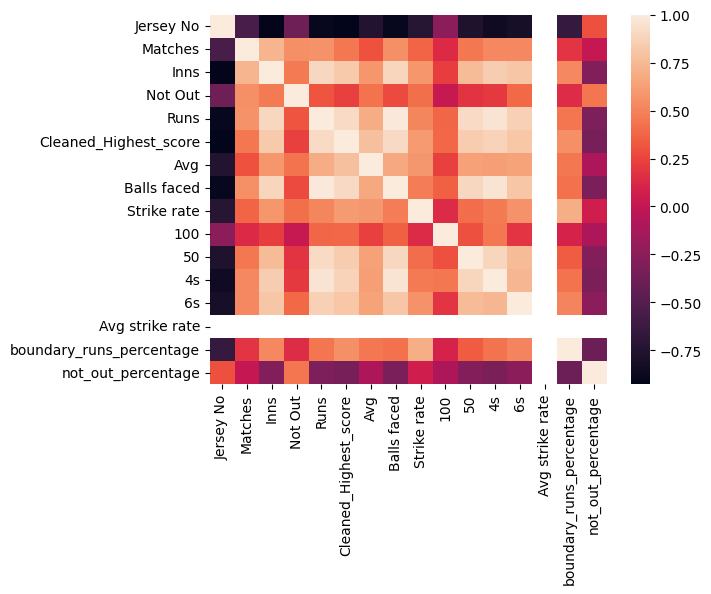

In [429]:
# Runs & Balls Faced: Very strong positive correlation → more balls faced = more runs.
# Runs & Innings: Strong correlation → more chances to bat increases runs.
# Runs & Boundaries (4s, 6s): Strong correlation → boundaries are major contributors to runs.
# Highest Score & Runs: Strong correlation → players with big scores accumulate more runs.
# Strike Rate & 6s: Moderate positive correlation → power hitters score faster.
# Strike Rate & Runs: Moderate correlation → speed helps, but volume matters more.
# 50s & Runs: Strong correlation → consistent scoring leads to higher totals.
# 100s & Runs: Weak to moderate correlation → high runs don’t always need centuries.
# Not-Out Percentage & Runs: Weak negative correlation → long innings often end in dismissals.
# Jersey Number: Strong negative correlation but not meaningful → should be ignored.

# heatmap of correlation between the features
sns.heatmap(df[cols].corr())

In [152]:
#Q8. Check the list of players who has an average greater than 50 as well strike rate above 125. Print player name, average and strike rate.
res=df[(df['Avg']>50) & (df['Strike rate']>125)][['Player','Avg','Strike rate']]
print(res)

# AND operator (&) used to follow both conditions

             Player     Avg  Strike rate
0          KL Rahul   55.83       129.34
4      Ishan Kishan   57.33       145.76
31   Kieron Pollard   53.60       191.42
36  Wriddhiman Saha   71.33       139.86
57     Deepak Hooda  101.00       142.25
60       Tom Curran   83.00       133.87


In [153]:
# Q9. Please check the list of players who has an average greater than 40 and balls faced above 100. Print player name, average and balls faced.
res=df[(df['Avg']>40) & (df['Balls faced']>100)][['Player','Avg','Balls faced']]
print(res)

# AND operator (&) used to follow both conditions

             Player    Avg  Balls faced
0          KL Rahul  55.83          518
1    Shikhar Dhawan  44.14          427
4      Ishan Kishan  57.33          354
8       Virat Kohli  42.36          384
9      ABD Villiers  45.40          286
10    Faf Duplessis  40.81          319
14      Eoin Morgan  41.80          302
24  Kane Williamson  45.28          237
27      Chris Gayle  41.14          210
28       Ben Stokes  40.71          200
31   Kieron Pollard  53.60          140
32    Rahul Tewatia  42.50          183
33  Ravindra Jadeja  46.40          135
36  Wriddhiman Saha  71.33          153
37  Ruturaj Gaikwad  51.00          169


# Data visualization

            Player  100
0         KL Rahul    1
1   Shikhar Dhawan    2
13  Mayank Agarwal    1
28      Ben Stokes    1


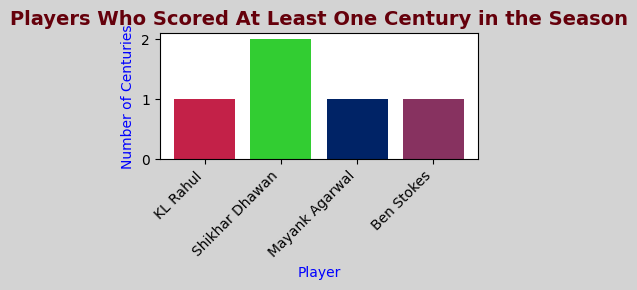

In [6]:
# Q10. Players who scored atleast one century in this season. Create visualization.

# Filter players who scored at least one century
century_players = df[df["100"] >= 1][["Player", "100"]]

# Print players
print(century_players)

# Visualization
plt.figure(figsize=(4,3), facecolor = "#d3d3d3")
colors = ['#c32148', '#32cd32','#002366','#873260']
plt.bar(century_players["Player"], century_players["100"],color = colors)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Player",color='blue')
plt.ylabel("Number of Centuries",color='blue')
plt.title("Players Who Scored At Least One Century in the Season",color='#65000b',fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()


              Player  50
0           KL Rahul   5
1     Shikhar Dhawan   4
2       David Warner   4
4       Ishan Kishan   4
5       Quinton Kock   4
6   Suryakumar Yadav   4
7   Devdutt Padikkal   5
9       ABD Villiers   5
10     Faf Duplessis   4


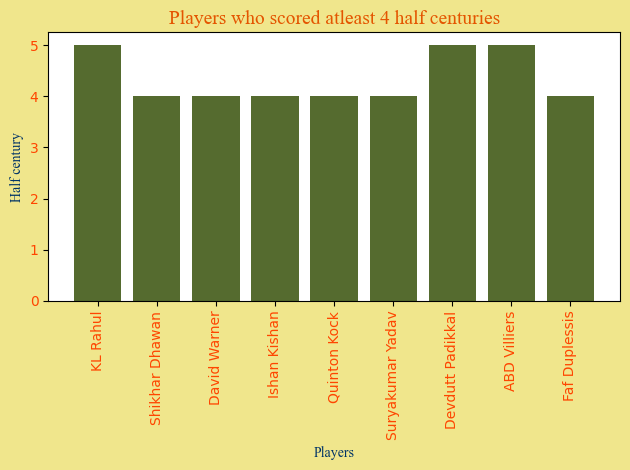

In [265]:
# Q11. Players who scored atleast 4 half centuries in this season.

# filter data - players who scored atleast 4 half centuries.
half_century_players = df[df['50']>=4][['Player','50']]
print(half_century_players)

# visualization using bar chart
plt.figure(dpi=100,facecolor="#f0e68c")
plt.bar(half_century_players['Player'], half_century_players['50'],color='#556b2f')
plt.title("Players who scored atleast 4 half centuries",fontsize=14,fontname = "Times New Roman", color= "#e45500")
plt.xlabel("Players",fontname = "Times New Roman", color="#003366")
plt.xticks(rotation=90,color = "#ff4500")
plt.ylabel('Half century',fontname = "Times New Roman", color = '#003366' )
plt.yticks(color = "#ff4500")
plt.tight_layout()
plt.show()

In [249]:
# Q12. Check the list of players who hit more than 45 boundaries and more than 10 sixes in this season.

filtered = df[(df['4s']>45) & (df['6s']>10)][['Player','4s','6s']]
filtered

,Player,4s,6s
0,KL Rahul,58,23
1,Shikhar Dhawan,67,12
2,David Warner,52,14
5,Quinton Kock,46,22
6,Suryakumar Yadav,61,11


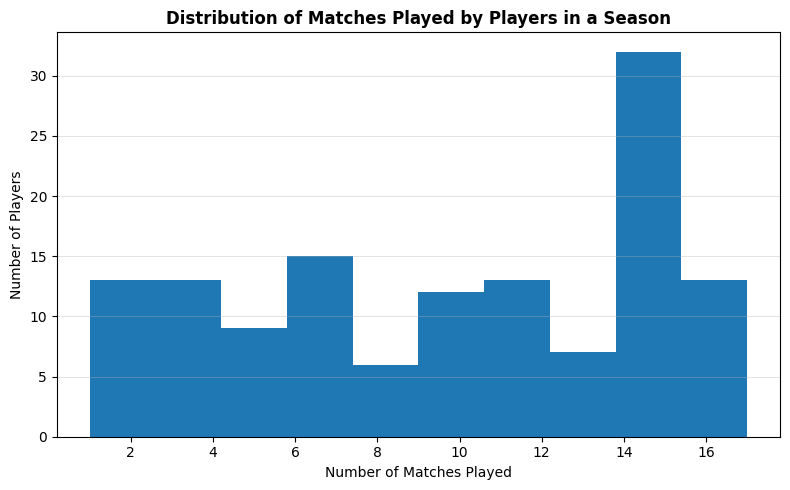

In [296]:
# Q13. Plot a histogram of number of matches played in a season by players.

plt.figure(figsize=(8, 5))
plt.hist(df["Matches"])
plt.xlabel("Number of Matches Played")
plt.ylabel("Number of Players")
plt.title("Distribution of Matches Played by Players in a Season", fontweight="bold")
# Clean gridlines
plt.grid(axis="y", linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()


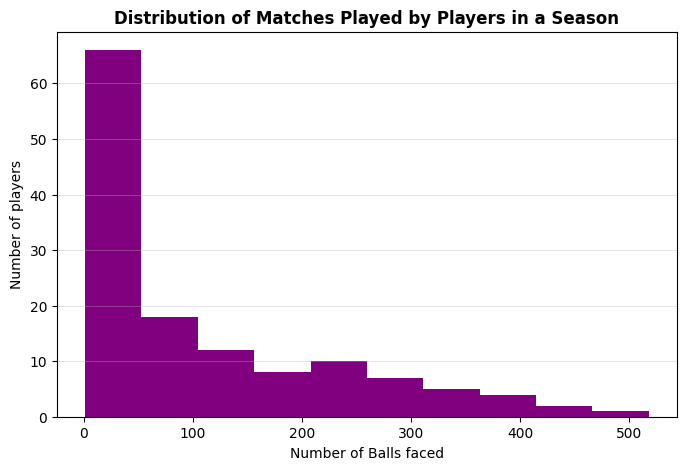

In [371]:
# Q14. Plot the histogram of balls faced by players.
plt.figure(figsize=(8,5))
plt.hist(df['Balls faced'],color = 'purple')
plt.xlabel('Number of Balls faced')
plt.ylabel('Number of players')
plt.title("Distribution of Matches Played by Players in a Season",fontweight = 'bold')
# Clean gridlines
plt.grid(axis="y", linewidth=0.5, alpha=0.5)
plt.show()

In [327]:
# Q15. Top 12 players with most runs in a season.

# sort_values() - sort the data on the basis of a columns in ascending or descending order.
sorted_df=df.sort_values(by='Runs',ascending = False)
sorted_df[['Player','Runs']].head(12)

,Player,Runs
0,KL Rahul,670
1,Shikhar Dhawan,618
2,David Warner,548
3,Shreyas Iyer,519
4,Ishan Kishan,516
5,Quinton Kock,503
6,Suryakumar Yadav,480
7,Devdutt Padikkal,473
8,Virat Kohli,466
9,ABD Villiers,454


In [337]:
# Q16. Print the players who played the match but didn't get the batting.

df[(df['Matches']>0) & (df['Inns']==0)][["Player", "Matches", "Inns"]]

# Matches > 0 - playeer played in the match
# Inns == 0 - player never came to bat
# AND (&) operator used for combine condiions

,Player,Matches,Inns


In [351]:
# Q17. Create a new column to show the percentage of total runs scored in 4s and 6s. Then print the top 5 players with maximum percentage.
# runs from 4s = 4s x 4
# runs from 6s = 6s x 6
# total boundary runs = (4s x 4) + (6s x 6)
# boundary runs percentage ={(4s x 4) + (6s x 6)/Runs}*100
df['boundary_runs_percentage'] = (((df['4s']*4) + (df['6s']*6))/df['Runs'])*100

# sort data as per the boundary_runs_percentage column in decending order.
top5 = df.sort_values(by = 'boundary_runs_percentage', ascending = False)[["Player", "boundary_runs_percentage"]].head(5)
top5

,Player,boundary_runs_percentage
109,Andrew Tye,100.000000
48,Andre Russell,76.923077
74,Chris Morris,76.470588
29,Hardik Pandya,73.309609
47,Sunil Narine,72.727273


In [7]:
# Q18. Print the players with top 5 Not out percentages (Not Out percentage can be calculated as number of Not outs divided by Innings).
df['not_out_percentage'] = (df['Not Out']/df['Inns'])*100
top_5 = df.sort_values(by = 'not_out_percentage', ascending = False)[['Player','not_out_percentage']].head(5)
top_5

,Player,not_out_percentage
122,Shahbaz Ahmed,100.0
97,Mohammad Nabi,100.0
114,T Natarajan,100.0
116,Rahul Chahar,100.0
113,Dhawal Kulkarni,100.0


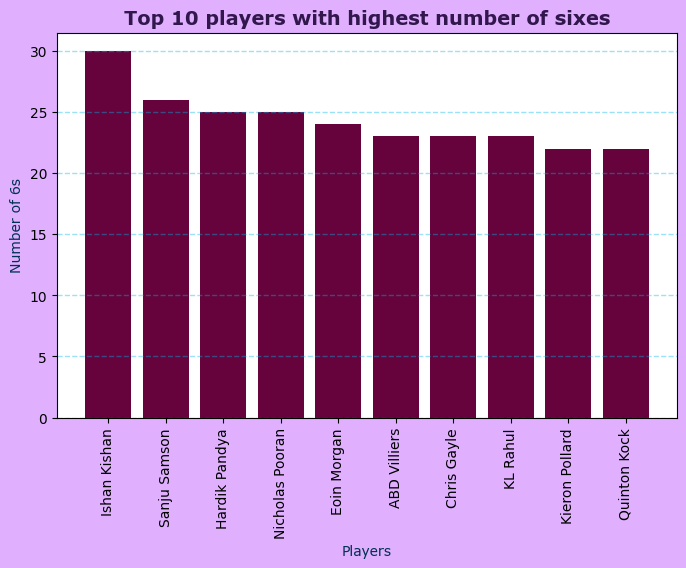

In [385]:
# Q19. Create visualization of top 10 players with highest number of sixes.
top_10 = df.sort_values(by = '6s', ascending = False)[['Player','6s']].head(10)
plt.figure(figsize=(8,5), facecolor = '#e0b0ff')
plt.bar(top_10['Player'], top_10['6s'], color = '#66023c')
plt.title("Top 10 players with highest number of sixes", fontweight = 'bold', fontsize = 14, fontname = 'verdana',color = '#32174d')
plt.xlabel('Players',fontname = 'verdana',color = '#003153')
plt.ylabel('Number of 6s',fontname = 'verdana',color = '#003153')
plt.xticks(rotation = 90)
plt.grid(axis = 'y', linewidth = 1, alpha = 0.4, color = '#00b7eb', linestyle = '--')
plt.show()

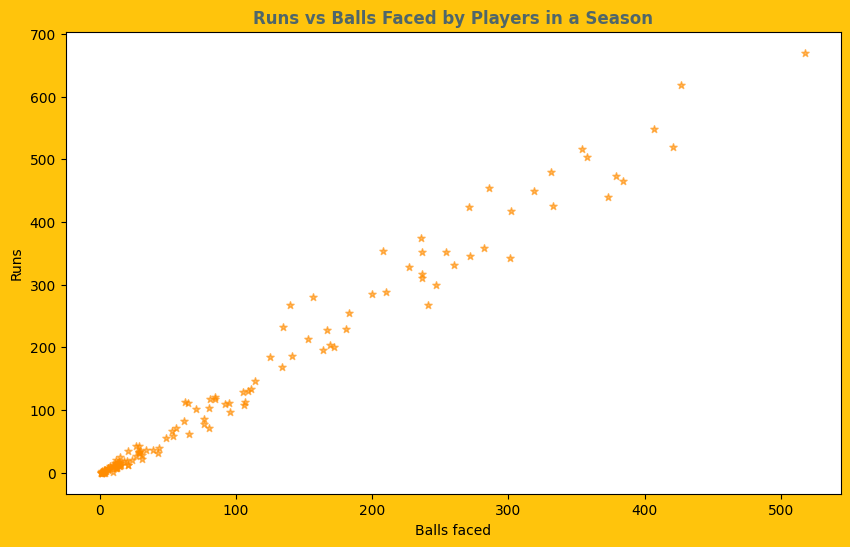

In [419]:
# Q20. Scatter plot of runs scored by a player v/s balls faced in a season. Then find the relationship between these 2 variables.
plt.figure(figsize = (10,6),facecolor = '#ffc40c')
plt.scatter(df['Balls faced'], df['Runs'], s=30, marker = '*', alpha = 0.6, color = '#ff8c00')
plt.title("Runs vs Balls Faced by Players in a Season", fontweight = 'bold', color = '#4f666a')
plt.xlabel('Balls faced')
plt.ylabel('Runs')
plt.show()

In [423]:
#  Relationship between Runs and Balls Faced by Players in a Season.
df[['Balls faced', 'Runs']].corr()

# The scatter plot shows a clear positive linear relationship
# As the number of balls faced increases, the runs scored also increase

,Balls faced,Runs
Balls faced,1.000000,0.989948
Runs,0.989948,1.000000


In [427]:
df.columns

Index(['Jersey No', 'Player', 'first name', 'last name', 'Matches', 'Inns',
       'Not Out', 'Runs', 'Highest Score', 'Cleaned_Highest_score', 'Avg',
       'Balls faced', 'Strike rate', '100', '50', '4s', '6s',
       'Avg strike rate', 'boundary_runs_percentage', 'not_out_percentage'],
      dtype='object')